before we start, don't forget the **area 51** in reinforcement learning which contains:
- agent
- environment
- action 
- reward 

# What we're going to do ❔ 

# 1-install dependencies



In [1]:
! pip install tensorflow
! pip install gym 
! pip install keras
! pip install keras-rl2

# 2- test random environment with openAI gym

- go to https://gym.openai.com
- click environments 
- you should see something like this 

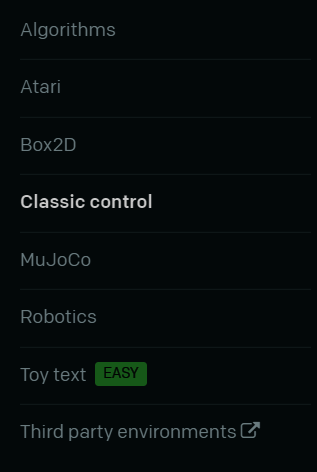



- choose any enviroment you want to work with, here we will choose **cart pole-v1** from **Algorithms**

### what is the idea behind the cartpole environment?

we have a pole (this tall yellow stick) that is attached to a cart(that black thing) which moves along a frictionless track. the system starts upright and we want to prevent the cart from falling over. a reward of **+1** is given at time step that the pole remains upright, the episode ends when the pole is 15 degress from the vertical, or the cart moves more than 2.4 units from the center.



In [2]:
from IPython.display import Image
Image(url='pole.gif')

**notes**: 
- at each time step we get a point from a maximum of 200 points.
- we have to actions here: left or right

In [7]:
# gym is an open-AI library 
import gym
import random


In [8]:
# let's build our environment 
env=gym.make('CartPole-v1') 
states=env.observation_space.shape[0]
actions=env.action_space.n

note that: here the states in the environment is returned as **tuple** --> (4, ) **but** we want to get the states number as int value so that we're going to deal with that later

In [9]:
type(states)

int

In [10]:
# you might find an error than no module called pygame, so do this
!pip install pygame
#دي بتخلي اللعبة تظهر 

In [11]:
actions

2

In [12]:
states

4

In [13]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = random.choice([0,1])
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))


Episode:1 Score:16.0
Episode:2 Score:16.0
Episode:3 Score:13.0
Episode:4 Score:10.0
Episode:5 Score:15.0
Episode:6 Score:18.0
Episode:7 Score:14.0
Episode:8 Score:21.0
Episode:9 Score:29.0
Episode:10 Score:27.0


as you can see here, the max score we got at epiode 9 was 29 and this so far away from the max which is for this environment is **200**

###  Things explained
The environment’s step function returns exactly what we need. In fact, step returns four values. These are:

- observation (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.

- reward (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.

- done (boolean): whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)

- info (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.

خلاصة الكود: عملت لوب من عشر ابسودس وفي بداية كل لوب بعمل ريسيت للستيت وطول ما الابسود الواحدة شغالة هخليه يعمل راندوم اكشنز وبعد كل اكشن بيبقي فيه ريورد بجمعها ع اللي قبلها عشان اجمع السكورز في الابسود الواحدة ودا طبعا لحد ما الابسود الواحدة تخلص ودا بيحصل لما اخسر مثلا او وقت يبنتهي او اكشن معين يعني يعملي تيرمنيت


it's just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an action, and the environment returns an observation and a reward.



### but we don't want this ‼ 

we don't want to make randoom actions and get the final score far from the max score, so we will use deep learning to optimize our actions in order to get a better score

# 3- build a deep learning model with keras

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [15]:
def build_model(states,actions):
    model=Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(24,activation='relu'))
    model.add(Dense(actions,activation='linear'))
    return model 

In [26]:
del model

In [27]:
model=build_model(states,actions)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4)                 0         
                                                                 
 dense_6 (Dense)             (None, 24)                120       
                                                                 
 dense_7 (Dense)             (None, 24)                600       
                                                                 
 dense_8 (Dense)             (None, 2)                 50        
                                                                 
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


***quick recap on keras layers dense and flatten***
results from every neuron of the preceding layers go to every single neuron of the dense layer. So we can say that if the preceding layer outputs a (M x N) matrix by combining results from every neuron, this output goes through the dense layer where the count of neurons in a dense layer should be N. and here we used flatten to deal with the input layer because as you know, we're working in multidimentional space and flatten convert that multidimentional space into 1D array so that Dense can deal with it,

▶For instance if the output of the previous layer is of shape (15, 3, 3, 4), flatten unstacks all the tensor values into a 1-D tensor of shape (15 * 3* 3 *4,) so that it can be used as input for a Dense layer.

**dense** do the following function:
output = activation(dot(input, kernel) + bias)---> so it makes a matrix vector multiplication

اللي عايزين نقوله هنا م الاخر ان احنا لما بنتعامل مع انبوت بيتمثل في صورة ملتي ديمنشنل اراي وتقريبا هنا الستيت المفروض انها تبل ف بيبقي ليها اكتر من ديمنشن,ف مش هنعرف نستخدم دنس لاير عشان هي بتاخد الانبوت ف صورة ون ديمنشنل اراي , وبالتالي هنستخدم فلاتن عشان هي اللي بتظبطلي الدنيا قبل ما ادخل الانبوت علي دنس

ممكن تجرب متستخدمش اللاير بتاعة الفلاتن بما ان الشيب بتاع التبل اللي فوق ب 1 وهتلاقي النتيجة هي هي << 

**in this part of code**, we only built a network that has the number of states as an input, and the number of actions as an output, in order to get the right action for the current state

# 4- Build Agent with Keras-RL

In [29]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [30]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn



In [44]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: 1.0000
54 episodes - episode_reward: 184.204 [54.000, 200.000] - loss: 25.616 - mae: 52.279 - mean_q: 105.021

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: 1.0000
58 episodes - episode_reward: 172.000 [84.000, 200.000] - loss: 19.869 - mae: 48.919 - mean_q: 98.453

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 69s 7ms/step - reward: 1.0000
50 episodes - episode_reward: 200.000 [200.000, 200.000] - loss: 19.672 - mae: 48.058 - mean_q: 96.665

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 68s 7ms/step - reward: 1.0000
54 episodes - episode_reward: 183.778 [43.000, 200.000] - loss: 22.794 - mae: 50.364 - mean_q: 100.958

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 69s 7ms/step - reward: 1.0000


In [45]:
scores = dqn.test(env, nb_episodes=50, visualize=False)
# calculate the mean of the scores of each episode
print(np.mean(scores.history['episode_reward']))

Testing for 50 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 2

## what was going on up there? 

**keras-rl** implements some state-of-the art deep reinforcement learning algorithms in Python and seamlessly integrates with the deep learning library Keras.

so, we opened the documentation for keras-rl and we found a number of agents that can work with continuous/discreate actions.
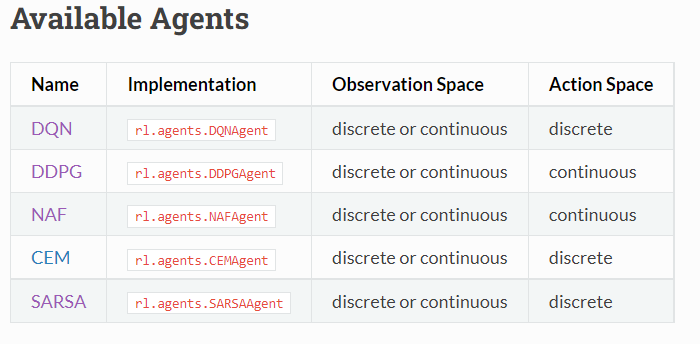



1- we decided to use DQN-agent

2- a funciton called build_agent was made and takes the deep model and the number of actions as function parameters.

## the DQNAgent function parameters:

**model**: it takes our previously built model!

**memory**: so what is sequential memory? 

it's simply used by the DQN agent to store various states transitions, actions, and rewards so that we don't have to make observations for the environment everytime. 

-->The **limit** parameter specifies how many entries the memory can hold. After exceeding this limit, older entries will be replaced by newer ones.

-->The **window_length** parameter controls how many observations are concatenated to form a "state".

**policy**: what is Boltzmann policy?(note: we have multiple types of exploration polices overthere depending on the type of action_space whether it's discret or continuous)

The Boltzmann exploration policy is intended for discrete action spaces. It assumes that each of the possible actions has some value assigned to it (such as the Q value), and uses a softmax function to convert these values into a distribution over the actions.


**nb_steps_warmup**:

Determines how long we wait before we start doing experience replay, which if you recall, is when we actually start training the network. This lets us build up enough experience to build a proper minibatch. If you choose a value for this parameter that’s smaller than your batch size, Keras RL will sample with a replacement. زي تدريب مبداي للاجنت قبل ما يبدا الترين الاساسي اللي احنا هنخليه ب 50000 ستيب 

#### target_model_update: 

The parameter controls how often the target network is updated. If target_model_update >= 1, the target model is updated every target_model_update-th step. I.e. if you set target_model_update = 10000, the target model will be updated on step 10 000, 20 000, and so on, i.e. we set target_model = model on these steps. On the other hand, if target_model_update < 1, we use something called soft updates. The idea here is similar but instead of updating the entire target model (hard update), we gradually adopt changes like so:  


**target_model = target_model_update * model + (1 - target_model_update) * target_model.**


The exact value of  **after how many steps we want to update our target model function?** needs tuning like any other hyperparameter. If your model becomes unstable, this is usually something that you want to decrease (in the case of soft updates) or increase (in the case of hard updates). and here we started used softupdate. 


3- then we will make compilation with keras optimizer.
(Note: Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.)

4-  we will fit and train our agent in the environment with 50000 steps


**verbose**

By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each episode

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

progres_bar

verbose=2 will just mention the number of epo like this:

x/y


**>>> try different values for: nb_steps_warmup , nb_steps(the more of steps here the better your agent performance)**

In [46]:
# now if you want to visualize your model within 5 episodes
_ = dqn.test(env, nb_episodes=5, visualize=True)


Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


# 5-Reloding Agent from memory


Now, what we're going to do is to save our model's weights in memory(maybe in .index file), and then reomve our model and rebuild it with our saved weights

In [47]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

**note that:**

**HDF5 file stands for Hierarchical Data Format 5. It is an open-source file which comes in handy to store large amount of data. As the name suggests, it stores data in a hierarchical structure within a single file.**

In [48]:
del model
del dqn
del env

In [49]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]

In [50]:
model = build_model(states, actions)

In [51]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [52]:
dqn.load_weights('dqn_weights.h5f')

In [53]:
_ = dqn.test(env, nb_episodes=5, visualize=True)


Testing for 5 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


In [43]:
from IPython.display import Image
Image(url='giphy.gif')